In [15]:
# %matplotlib inline
from random import *
from matplotlib.pyplot import *
from math import *
from numpy import *
import numpy.random as rd
from scipy.misc import *
from scipy.special import *
from scipy.stats import *
from scipy.linalg import *
from pylab import *
#from scipy import *

In [ ]:
def marche(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        alpha=0
        X=[0]*n
        X[0]=0
        for i in range(1,n):
            z=rd.uniform(0,1)
            if z<a :
                alpha=b
            else :
                alpha=1-b
            z2=rd.uniform(0,1)
            if z2<alpha :
                X[i]=X[i-1]+1
            else :
                X[i]=X[i-1]-1
    #print(X)
    #print (len(X))
    eta=(1-2*a)*log(b/(1-b))
    espRho=(a*(1-2*b)+b*b)/(b*(1-b))
    limX=X[n-1]/(n-1)
    m=(1-espRho)/(1+espRho)
    print("eta="+str(eta))
    print("espérance de rho ="+str(espRho))
    print("m="+str(m)+" et limite de X/n="+str(limX))    
    return X
    
marche(9/10,3/4,100000000)

        

eta=-0.36620409622270317


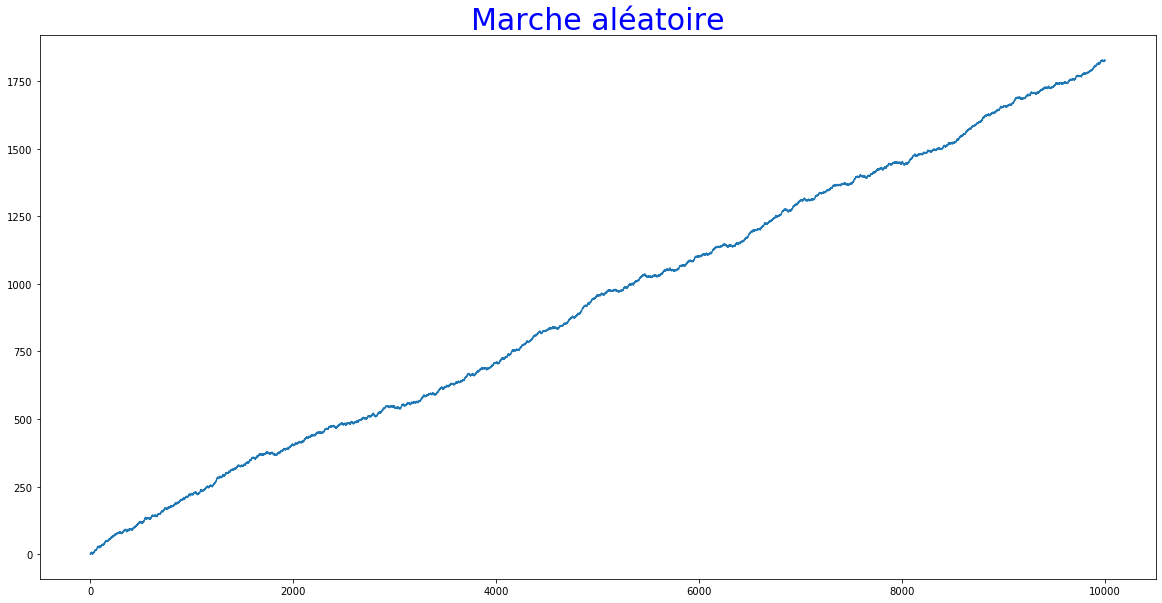

In [33]:
def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

plot_marche(2/3,3/4,10000)